In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl   
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import glob
import os

In [40]:
def txt2csv(directory_path, format='v1'):
    csv_files = glob.glob(directory_path + '/*.csv')
    column_names = ['Wavelength', 'Intensity']
    samples = []
    for file in csv_files:
        if format == 'v1':
            df = pd.read_csv(file, skiprows=4, names=column_names)[:-1]
        elif format == 'v2':
            df = pd.read_csv(file, skiprows=1, names=column_names)
        df = df.pivot_table(index=None, values='Intensity', columns='Wavelength', sort=False)
        df['covid_status'] = 'positive'
        df['description'] = os.path.basename(file).replace('_785M-T_Rlab.csv', '')
        samples.append(df)
    return pd.concat(samples, ignore_index=True)

In [41]:
tmp_df = txt2csv('../../input/clinical_sample/*', format='v2')

In [42]:
tmp_df.shape

(35, 1333)

In [43]:
tmp_df['description'][0]

's1_1'

In [44]:
display(tmp_df.head().T)

,0,1,2,3,4
Wavelength,,,,,
320,25.2983,20.30437,16.893959,-36.049651,-11.886235
321,31.479134,-3.791936,16.638892,-19.645126,-12.665922
322,35.972784,-22.084277,16.978177,-2.667237,-11.410453
323,42.426246,-23.550407,22.367232,9.265691,4.168963
324,50.000132,-10.324397,30.121312,16.180717,29.627829
...,...,...,...,...,...
1648,5.494818,1.140878,1.415732,-4.302907,-20.411472
1649,-5.673703,7.089428,2.36151,1.27773,-26.535186
1650,-11.573432,9.249651,-11.636861,-8.427642,-27.951783


In [45]:
X = tmp_df.drop(['covid_status', 'description'], axis=1)
X.columns = X.columns.astype(int)
y_diagnostic = tmp_df['covid_status']

In [46]:
wavelength = X.columns
intensity = X.values

In [50]:
mpl.rc('figure.subplot', left=.2, right=.8, bottom=.2, top=.8)
width, height = 20, 6
mpl.rcParams['figure.figsize'] = [width, height]
# custom_colors = plt.rcParams['axes.prop_cycle']() 

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
custom_xticks = [0] + [i for i in range(350, 1651, 50)]
custom_xlim = (0, 1331)

sns.set_context("paper", rc={"lines.linewidth": 1})
sns.set_style('white')

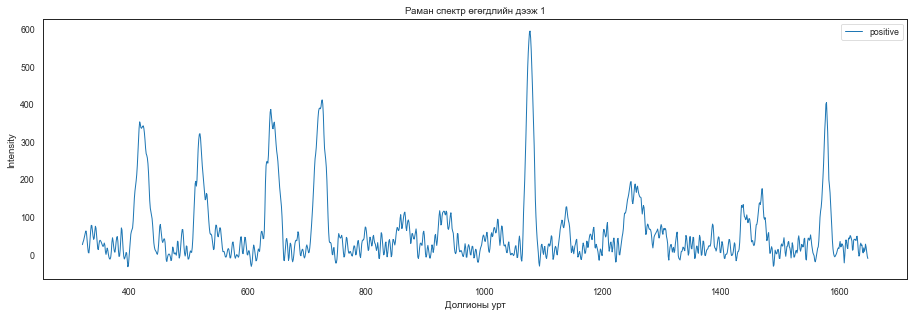

In [51]:
fig, ax = plt.subplots()

sns.lineplot(x=wavelength, y=intensity[0], ax=ax, label=f'{y_diagnostic[0]}')
ax.set_title("Раман спектр өгөгдлийн дээж 1")
ax.set_xlabel('Долгионы урт')
ax.set_ylabel('Intensity')
ax.legend()

plt.show()

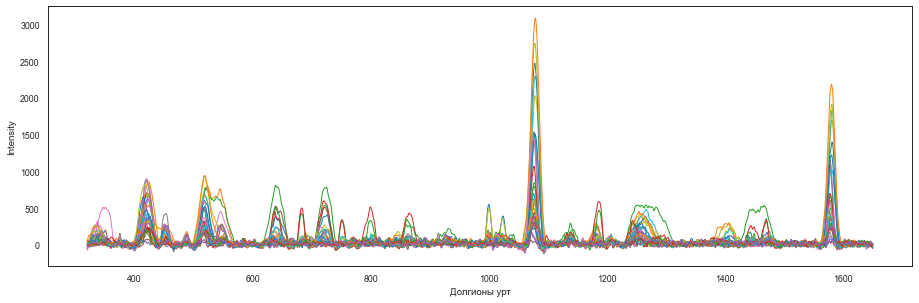

In [52]:
fig, ax = plt.subplots()

for i in range(len(intensity)):
    ax.plot(wavelength, intensity[i])
ax.set_xlabel('Долгионы урт')
ax.set_ylabel('Intensity')
plt.show()

In [ ]:
tmp_df.to_csv('../../input/clinical_sample/spectrum.csv', index=None)